In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logomaker as lm
import re
import sys
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Polygon

# My functions
sys.path.insert(0,'../')
import utils

# Useful variables
e = np.exp(1)
idx = pd.IndexSlice
_ = np.newaxis

# Load style file
plt.style.use('../fig.style')

In [2]:
# Load MPSA data
smn2_df = pd.read_csv('../data/mpsa_data_smn2.csv', index_col=0)
smn2_df.head()

,smn2_dmso,smn2_dmso_log_std,smn2_rg,smn2_rg_log_std,smn2_nvs,smn2_nvs_log_std
ss,,,,,,
AAAA/GUAAGU,94.816183,0.038251,74.969468,0.043137,81.631149,0.056442
AACA/GUAAGU,86.257933,0.043625,72.047758,0.056629,90.199186,0.064540
AAGA/GUAAAU,0.119696,0.279578,0.000000,0.533347,0.384295,0.314739
AAGA/GUAACU,0.208651,0.125712,0.000000,0.479768,0.209434,0.237570
AAGA/GUAAGA,0.496079,0.270210,23.553215,0.141298,76.988843,0.059458


In [3]:
valid_ss = smn2_df.index.values
len(valid_ss)

285

analyzing lib1, i.e. ../data/mpsa/cipher_files/cipher.smn2_ssbc_lib1.txt...
analyzing lib2, i.e. ../data/mpsa/cipher_files/cipher.smn2_ssbc_lib4.txt...
analyzing lib3, i.e. ../data/mpsa/cipher_files/cipher.smn2_ssbc_lib6.txt...


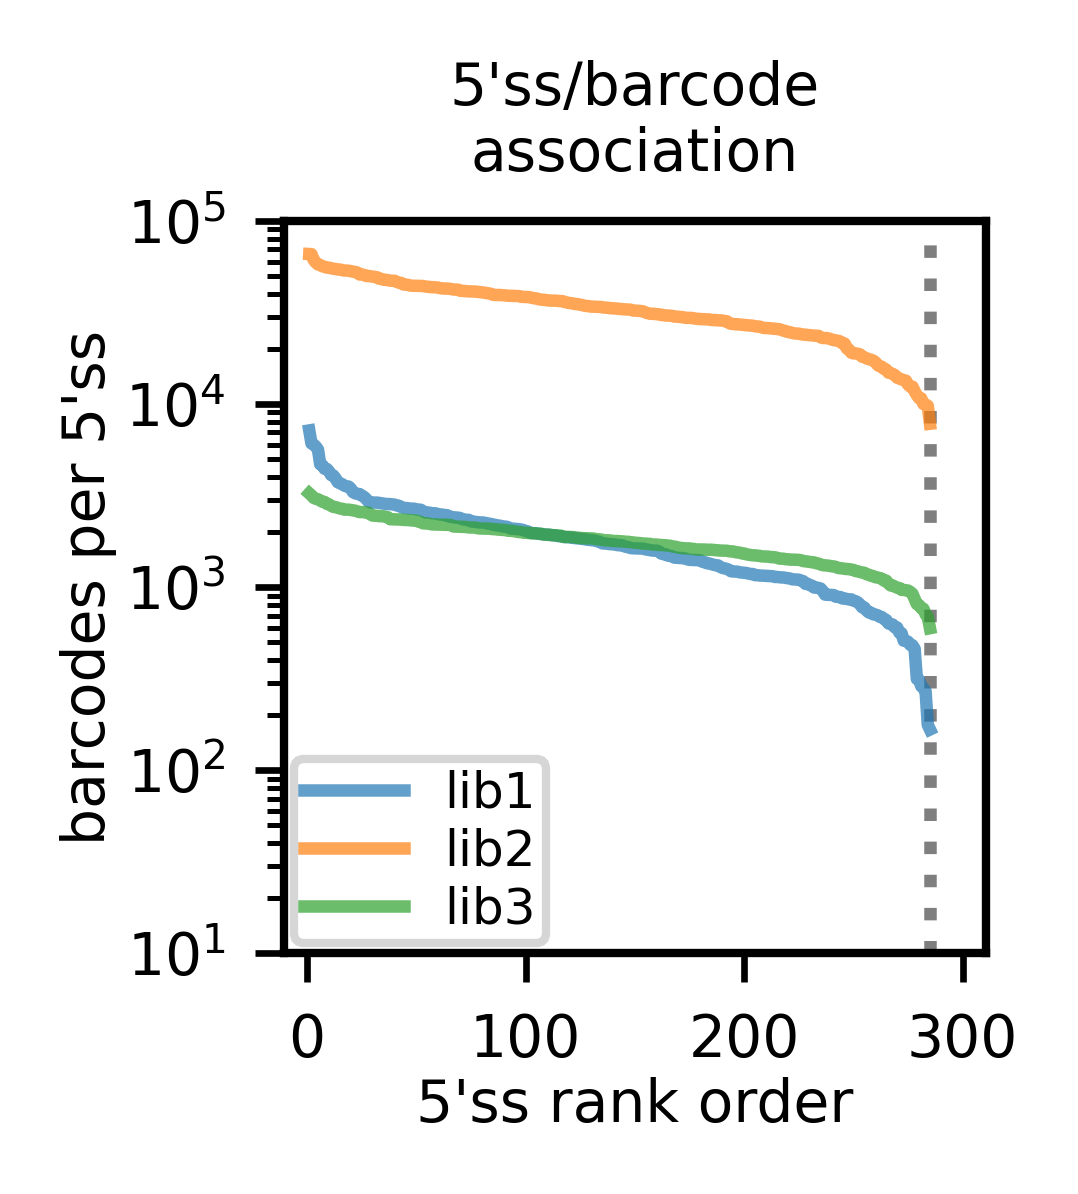

In [6]:
# Specify mapping from lib number to ssbc lib name
lib_num_to_ssbc_lib_name_dict = {
    1:'smn2_ssbc_lib1',
    2:'smn2_ssbc_lib4',
    3:'smn2_ssbc_lib6'}

# Specify drawing funciton
def draw_num_bc(ax):
    
    # Summarize number of barcodes for each 5'ss in each lib
    num_bc_df = pd.DataFrame(index=valid_ss)
    for lib_num in [1,2,3]:
        file_name = f'../data/mpsa/cipher_files/cipher.{lib_num_to_ssbc_lib_name_dict[lib_num]}.txt'
        col = f'lib{lib_num}'
        print(f'analyzing {col}, i.e. {file_name}...')
        tmp_df = pd.read_csv(file_name, sep='\t', index_col=0)
        tmp_df['ss'] = [s.replace('T','U') for s in tmp_df['ss']]
        tmp_df['ss'] = [s[:4]+'/'+s[4:] for s in tmp_df['ss']]

        tmp_df = tmp_df[tmp_df['ss'].isin(valid_ss)]
        num_bc_df[col] = tmp_df[['ss','ct']].groupby('ss').sum()
    
    for lib_num in [1,2,3]:
        col = f'lib{lib_num}'
        vals = num_bc_df[col].values
        vals = np.sort(vals)[::-1]
        x = np.arange(1,len(vals)+1)
        num_5ss = len(vals)
        ax.plot(x, vals, label=f'lib{lib_num}', alpha=.7)
    
    ax.set_yscale('log')
    ax.set_xlim([-10.5, 310.5])
    ax.set_xticks([0, 100, 200, 300])
    ax.set_xlabel(f'5\'ss rank order')
    ax.set_ylabel(f'barcodes per 5\'ss')
    ax.set_title('5\'ss/barcode\nassociation')
    ax.set_ylim([1E1, 1E5])
    ax.axvline(285, linestyle=':', color='k', alpha=.5, zorder=-100)
    ax.legend(loc='lower left', fontsize=6)
    
# Make figure S1
fig, ax = plt.subplots(1,1,figsize=[1.8, 2.0], sharey=False)
draw_num_bc(ax=ax)
plt.tight_layout()
fig.savefig('figS1G.pdf', facecolor=None)

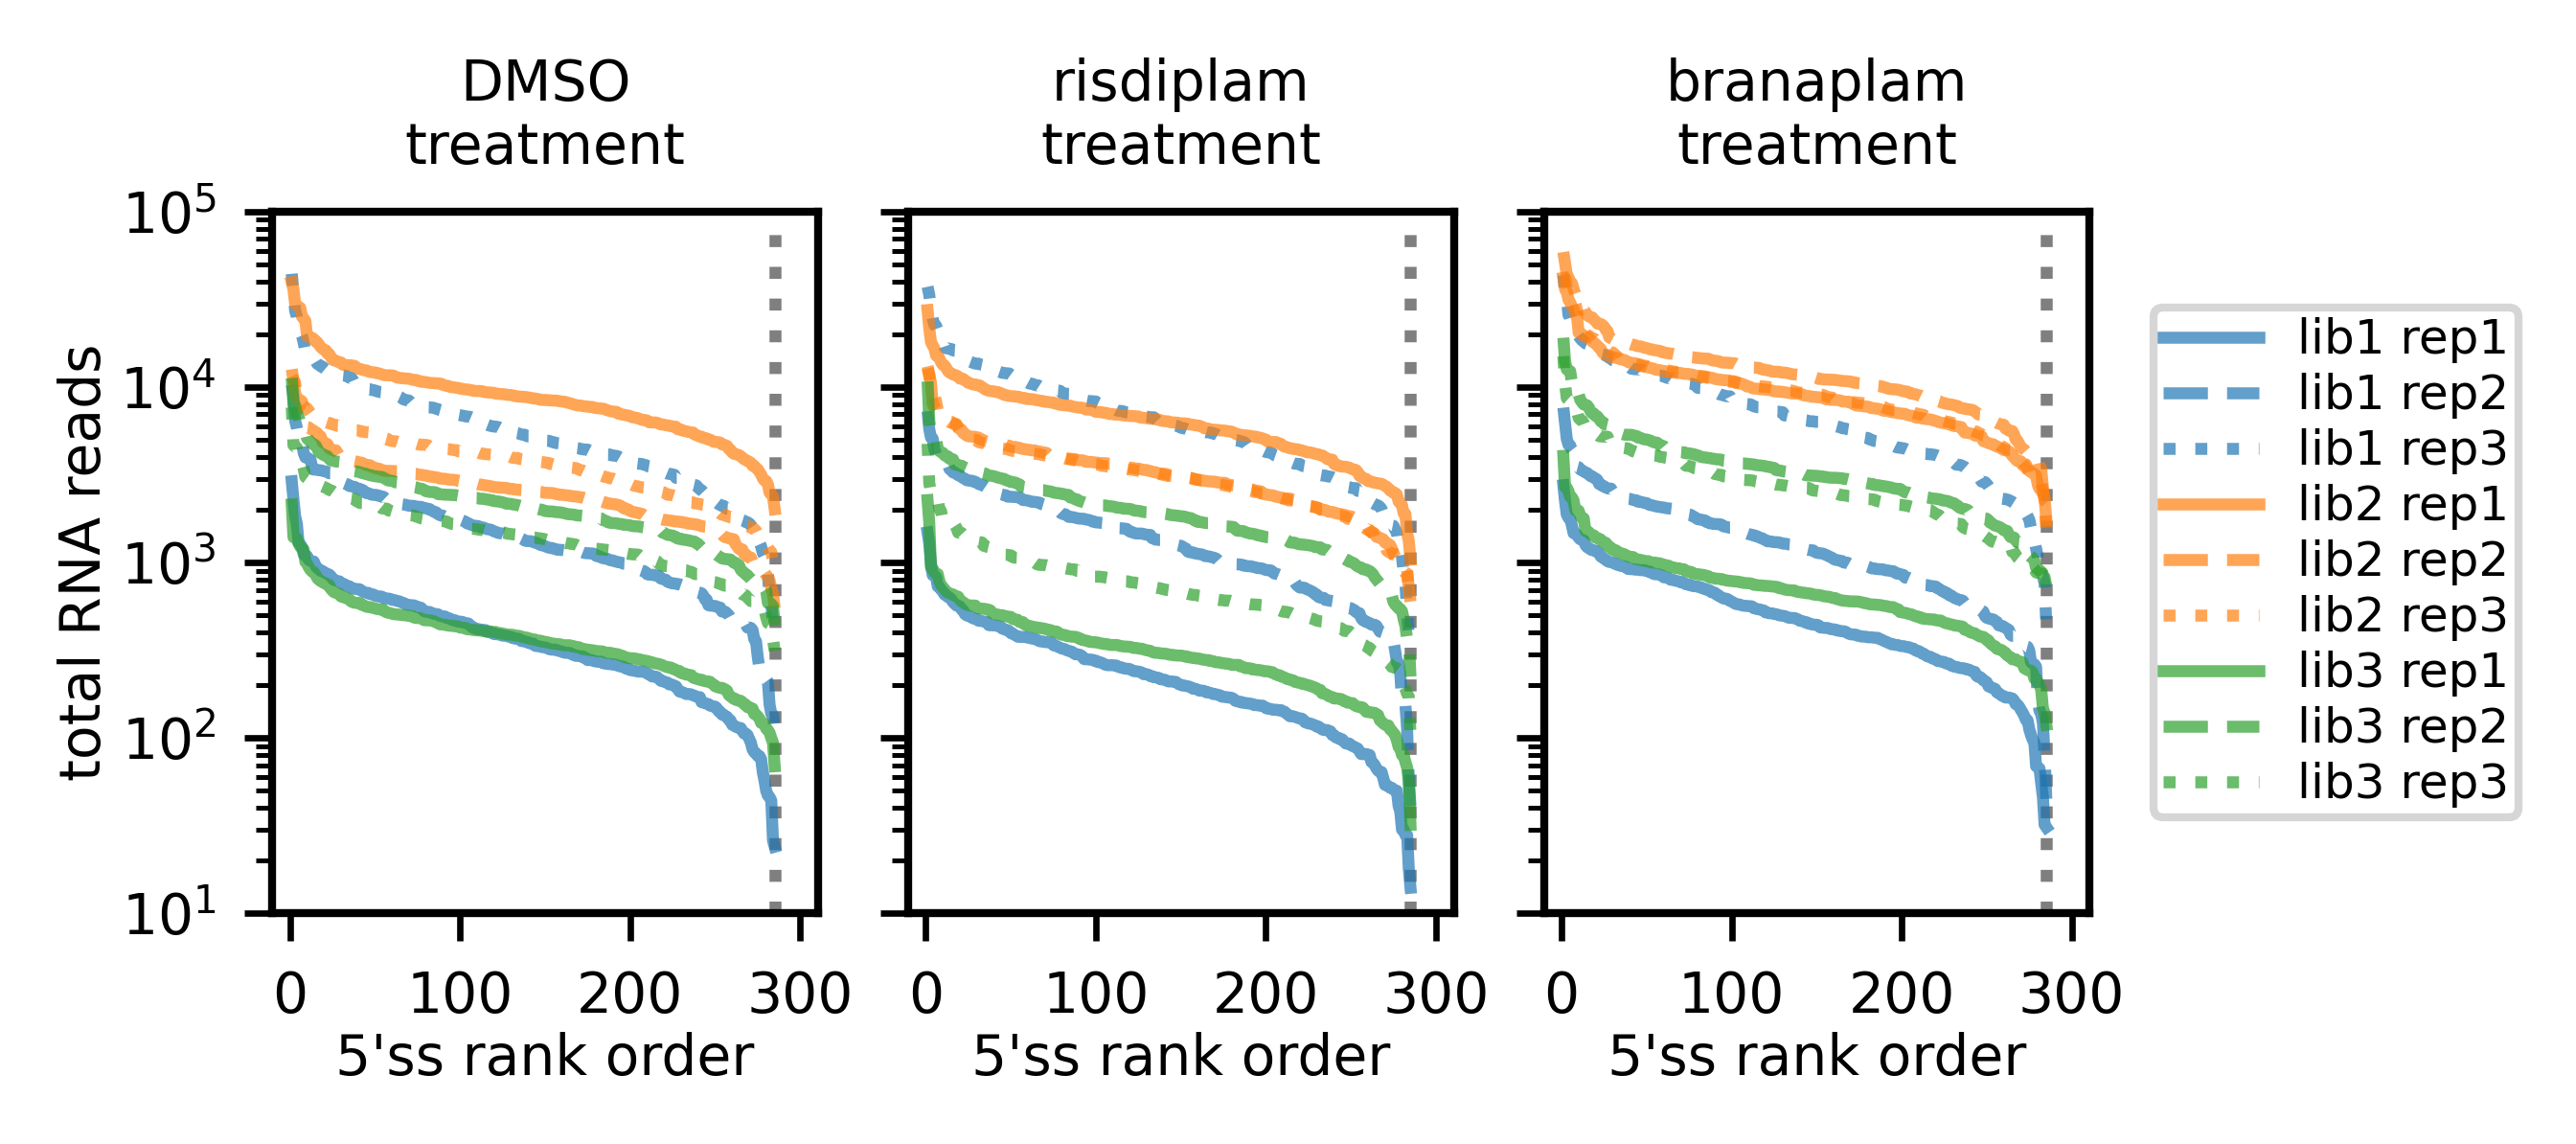

In [7]:


treatment_to_file_name_dict = {
    'DMSO':'total_smn2_dmso.csv',
    'risdiplam':'total_smn2_rg.csv',
    'branaplam':'total_smn2_nvs.csv',
}

lib_num_to_color = {
    1:'C0',
    2:'C1',
    3:'C2'
}

rep_num_to_linestyle = {
    1:'-',
    2:'--',
    3:':'
}

# Specify drawing funciton
def draw_num_reads(treatment, ax, legend=None, show_ylabel=False):
    file_name = f'../data/mpsa/{treatment_to_file_name_dict[treatment]}'
    tmp_df = pd.read_csv(file_name, sep=',', index_col=0).astype(int)
    for lib_num in [1,2,3]:
        for rep_num in [1,2,3]:
            col = f'smn2_select_lib{lib_num}_rep{rep_num}'
            label = f'lib{lib_num} rep{rep_num}'
            vals = tmp_df[col].values
            vals = np.sort(vals)[::-1]
            x = np.arange(1,len(vals)+1)
            ax.plot(x, vals, alpha=.7, label=label, 
                    color=lib_num_to_color[lib_num], 
                    linestyle=rep_num_to_linestyle[rep_num])
            
    ax.set_yscale('log')
    ax.set_xlim([-10.5, 310.5])
    ax.set_xticks([0, 100, 200, 300])
    ax.set_xlabel(f'5\'ss rank order')
    if show_ylabel:
        ax.set_ylabel(f'total RNA reads')
    else:
        ax.set_yticklabels('')
    ax.set_title(f'{treatment}\ntreatment')
    ax.set_ylim([1E1, 1E5])
    if legend:
        ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), fontsize=6)
    ax.axvline(285, linestyle=':', color='k', alpha=.5, zorder=-100)


# Make figure S1
fig, axs = plt.subplots(1,3,figsize=[4.5, 2.0], sharey=False)
treatments = ['DMSO', 'risdiplam', 'branaplam']

draw_num_reads(treatment='DMSO', ax=axs[0], show_ylabel=True)

draw_num_reads(treatment='risdiplam', ax=axs[1])

draw_num_reads(treatment='branaplam', ax=axs[2], legend=True)
    
fig.tight_layout(w_pad=.5)
fig.savefig('figS1H.pdf', facecolor=None)